#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
%matplotlib inline

## Data

The **economy** dataset contains information related to the economic development for each region, namely gross domestic product (GDP) and human capital index.

#### Background research

- **Gross domestic product (GDP)** -  monetary value of all finished goods and services made within a country during a specific period

- **Gross domestic product per capita** - gross domestic product divided by the country's total population

- **Human capital index** - measures the amount of human capital (knowledge, skills, and health) that a child born today can expect to attain by age 18, given the risks of poor health and poor education that prevail in the country where the child lives

## Read data

#### Reading .json files

In [2]:
economy = pd.read_json('data/economy.json', orient='split')
economy.head()

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389
3,AG,1.727759e+09,17790.0,NaN
4,AL,1.527808e+10,5352.0,0.621


#### Select data

**location_key** is a unique identifier for the country and subregions that can be used to merge all the datasets and correlate selected information from these datasets.

Of the 4 columns in the **economy** dataset, only the columns **location_key**, **gdp_usd**, and **gdp_per_capita_usd** seem necessary for the analysis of COVID-related cases. The **human_capital_index** column can be dropped from the dataset.

In [19]:
economy.drop('human_capital_index', axis=1, inplace=True)
economy.head()

,location_key,gdp_usd,gdp_per_capita_usd
0,AD,3.154058e+09,40886.0
1,AE,4.211423e+11,43103.0
2,AF,1.910135e+10,502.0
3,AG,1.727759e+09,17790.0
4,AL,1.527808e+10,5352.0


Only the **data per country** are necessary, therefore remove all rows for subregions, which are denoted by the locations with "_" under the **location_key** column:

In [20]:
economy = economy[economy['location_key'].str.contains("_") == False].reset_index(drop=True)
economy.head()

,location_key,gdp_usd,gdp_per_capita_usd
0,AD,3.154058e+09,40886.0
1,AE,4.211423e+11,43103.0
2,AF,1.910135e+10,502.0
3,AG,1.727759e+09,17790.0
4,AL,1.527808e+10,5352.0


## Data Preparation

#### Check data types

The **location_key** column is an object while the two numeric columns of the economy dataset are all floating point numbers.

In [21]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location_key        203 non-null    string 
 1   gdp_usd             203 non-null    float64
 2   gdp_per_capita_usd  203 non-null    float64
dtypes: float64(2), string(1)
memory usage: 4.9 KB


Change the data type of **location_key** to string:

In [22]:
economy = economy.astype({'location_key':'string'})
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location_key        203 non-null    string 
 1   gdp_usd             203 non-null    float64
 2   gdp_per_capita_usd  203 non-null    float64
dtypes: float64(2), string(1)
memory usage: 4.9 KB


#### Check unique values

Check that **location_key** column only has unique values for each row to ensure that no country is duplicated:

In [23]:
economy['location_key'].is_unique

True

#### Check for missing values

The dataset has no missing values:

In [24]:
economy.isna().sum()

location_key          0
gdp_usd               0
gdp_per_capita_usd    0
dtype: int64

#### Check for outliers and out-of-range values

The descriptive statistics, including the central tendency, dispersion and shape of a dataset’s distribution, are shown below. 

In [25]:
economy.describe().applymap("{0:.2f}".format)

,gdp_usd,gdp_per_capita_usd
count,203.00,203.00
mean,427140770724.73,17989.09
std,1890008781777.86,26649.15
min,47271463.00,261.00
25%,6236429369.00,2257.50
50%,27591261663.00,6966.00
75%,212445406771.50,23192.50
max,21374418877706.00,185829.00


Use a boxplot to detect outliers in the dataset:

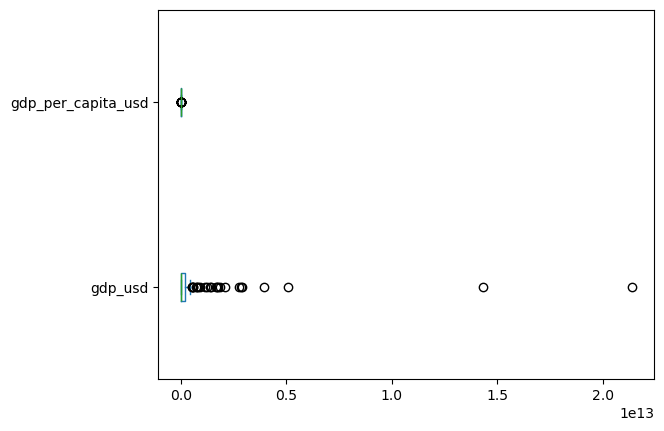

In [26]:
economy.plot.box(vert=False)
plt.show()

The **gdp_usd** column seem to have two outliers, but these data are for the two countries with the largest economies in the world, USA and China, therefore the high values seem valid.

In [27]:
economy[(economy['gdp_usd'] > 1.0e13)]

,location_key,gdp_usd,gdp_per_capita_usd
38,CN,1.434290e+13,10261.0
191,US,2.137442e+13,65118.0
